# Simulator

Run offline simulation of the sampler. The input is a list of midi commands and the output i an audio file.

In [1]:
%matplotlib notebook
import subprocess

from numpy import *
from matplotlib.pyplot import *
from scipy import signal
from scipy.io import wavfile

import pandas as pd
import IPython.display as idp

## Input

In [2]:
%%writefile ../app/midi.csv
Time,   Status, Data0, Data1
0,      144,    48,    127
10000,  144,    51,    127
20000,  144,    55,    127
200000, 128,    48,    0
210000, 128,    51,    0
220000, 128,    55,    0

Overwriting ../app/midi.csv


## Run simulation

In [3]:
s = subprocess.check_output(["../app/sbnsampler", "300000"], cwd="../app/").decode()
print(s)

Simulation: 300000 samples
90 30 7f
90 33 7f
90 37 7f
80 30 00
80 33 00
80 37 00



## Analyze

<IPython.core.display.Javascript object>


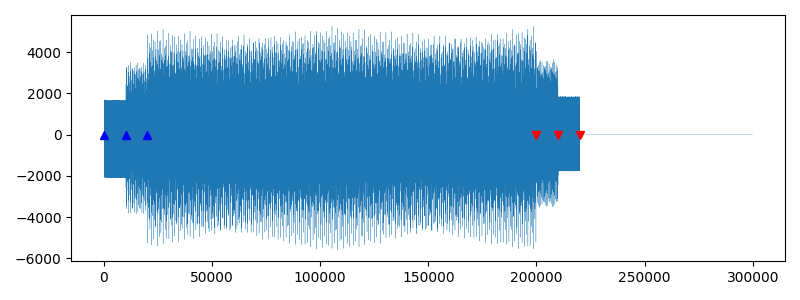

,Time,Status,Data0,Data1
0,0,144,48,127
1,10000,144,51,127
2,20000,144,55,127
3,200000,128,48,0
4,210000,128,51,0
5,220000,128,55,0


In [4]:
midi = pd.read_csv("../app/midi.csv", comment="#")
midi.columns = midi.columns.str.strip()

fs, x = wavfile.read("../app/dac.wav")
idp.display(idp.Audio("../app/dac.wav"))

fig, ax1 = subplots(1, 1, figsize=[8, 3])
t = arange(len(x))
ax1.plot(t, x, linewidth=0.2);

for n in midi.loc[midi["Status"] == 144]["Time"]:
    ax1.plot(n, 0, "^b")
    
for n in midi.loc[midi["Status"] == 128]["Time"]:
    ax1.plot(n, 0, "vr")
    
fig.tight_layout()
idp.display(midi)